In [1]:
import numpy as np 
import astropy.table as atable

In [27]:
import h5py

In [2]:
import corner as DFM
import matplotlib.pyplot as plt

In [3]:
halos = atable.Table.read('/tigress/chhahn/CAMELS/tng.rockstar.halos.dat', format='ascii')

In [31]:
f = h5py.File('/tigress/chhahn/CAMELS/tng.rockstar.halos.hdf5', 'w')
for col in halos.columns: 
    f.create_dataset(col, data=np.array(halos[col].data))
f.close

<bound method File.close of <HDF5 file "tng.rockstar.halos.hdf5" (mode r+)>>

In [4]:
print(f'{len(halos)} halos')

6127519 halos


In [5]:
halos.columns

<TableColumns names=('M_star','numSubStruct','numSubStruct_Mstar1e9','Xoff','Voff','logMstar','logMvir','logVmax','Spin','concentration','b_to_a','c_to_a','logMacc','logVacc','logMpeak','logVpeak','Acc_Rate_Inst','Acc_Rate_1*Tdyn','Tidal_Force_Tdyn','Om','s8','Asn1','Asn2','Aagn1','Aagn2')>

In [6]:
_data = np.array([np.array(halos[col].data) for col in ['Voff', 'logMvir', 'Spin', 'concentration', 'Om', 's8', 'Asn1', 'Asn2', 'Aagn1', 'Aagn2']]).T

In [22]:
Mlim = np.array(halos['logMvir'] > 10.) & (halos['logMstar'] > 0.)
print(f'{np.sum(Mlim)} halos with Mvir > 10^10 with central galaxies')

1193214 halos with Mvir > 10^10 with central galaxies


In [23]:
ranges = [np.nanquantile(col, (0.01, 0.99)) for col in _data[Mlim].T]

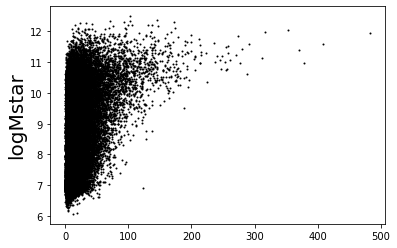

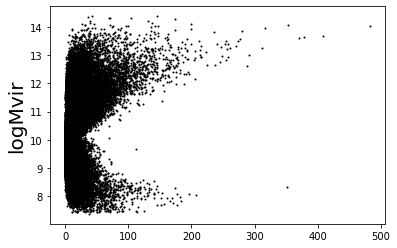

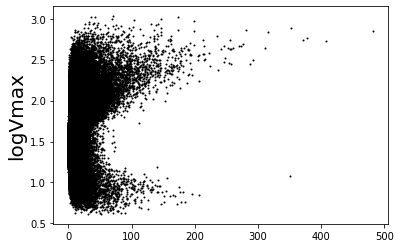

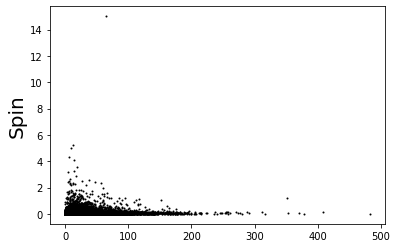

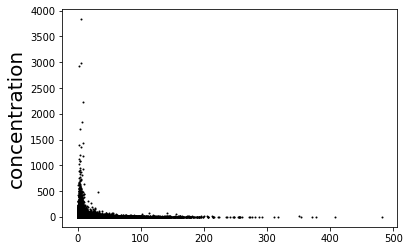

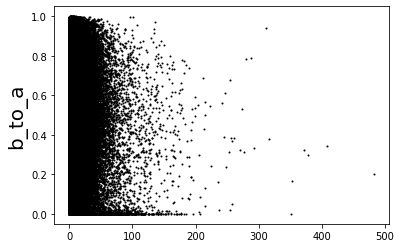

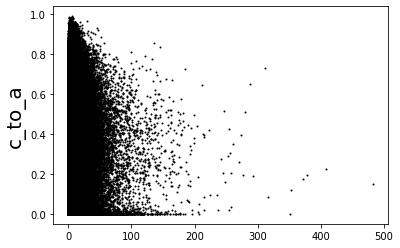

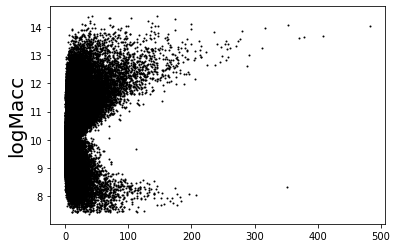

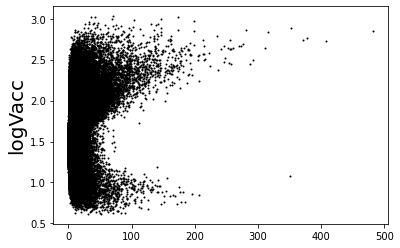

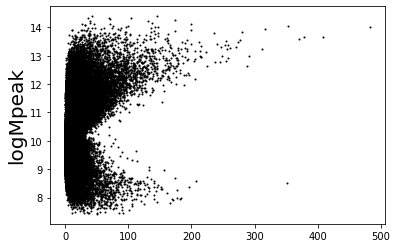

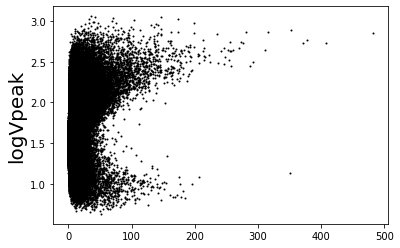

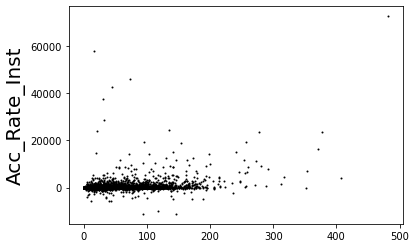

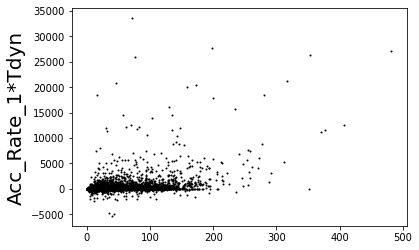

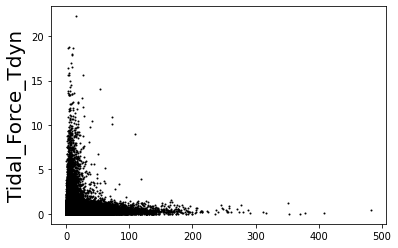

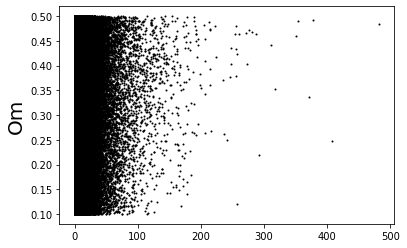

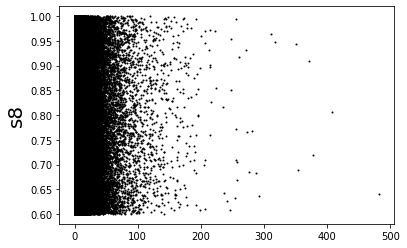

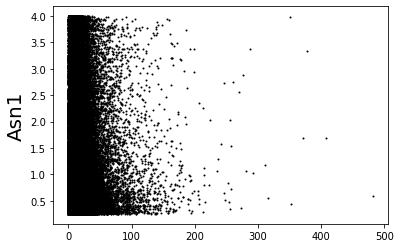

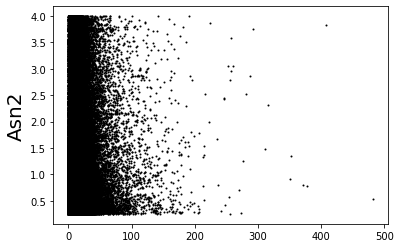

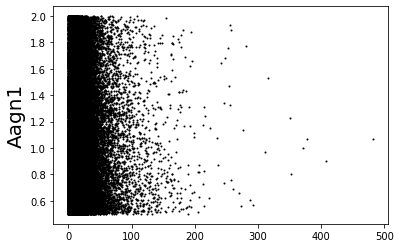

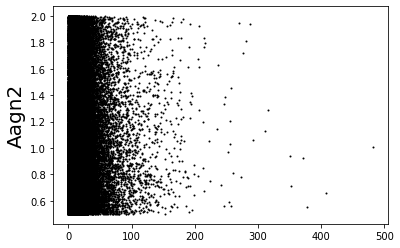

In [34]:
for col in ['logMstar','logMvir','logVmax','Spin','concentration','b_to_a','c_to_a','logMacc','logVacc','logMpeak','logVpeak','Acc_Rate_Inst','Acc_Rate_1*Tdyn','Tidal_Force_Tdyn','Om','s8','Asn1','Asn2','Aagn1','Aagn2']: 
    plt.scatter(np.array(halos['Voff'].data)[::10], np.array(halos[col].data)[::10], c='k', s=1)
    plt.ylabel(col, fontsize=20)
    plt.show()

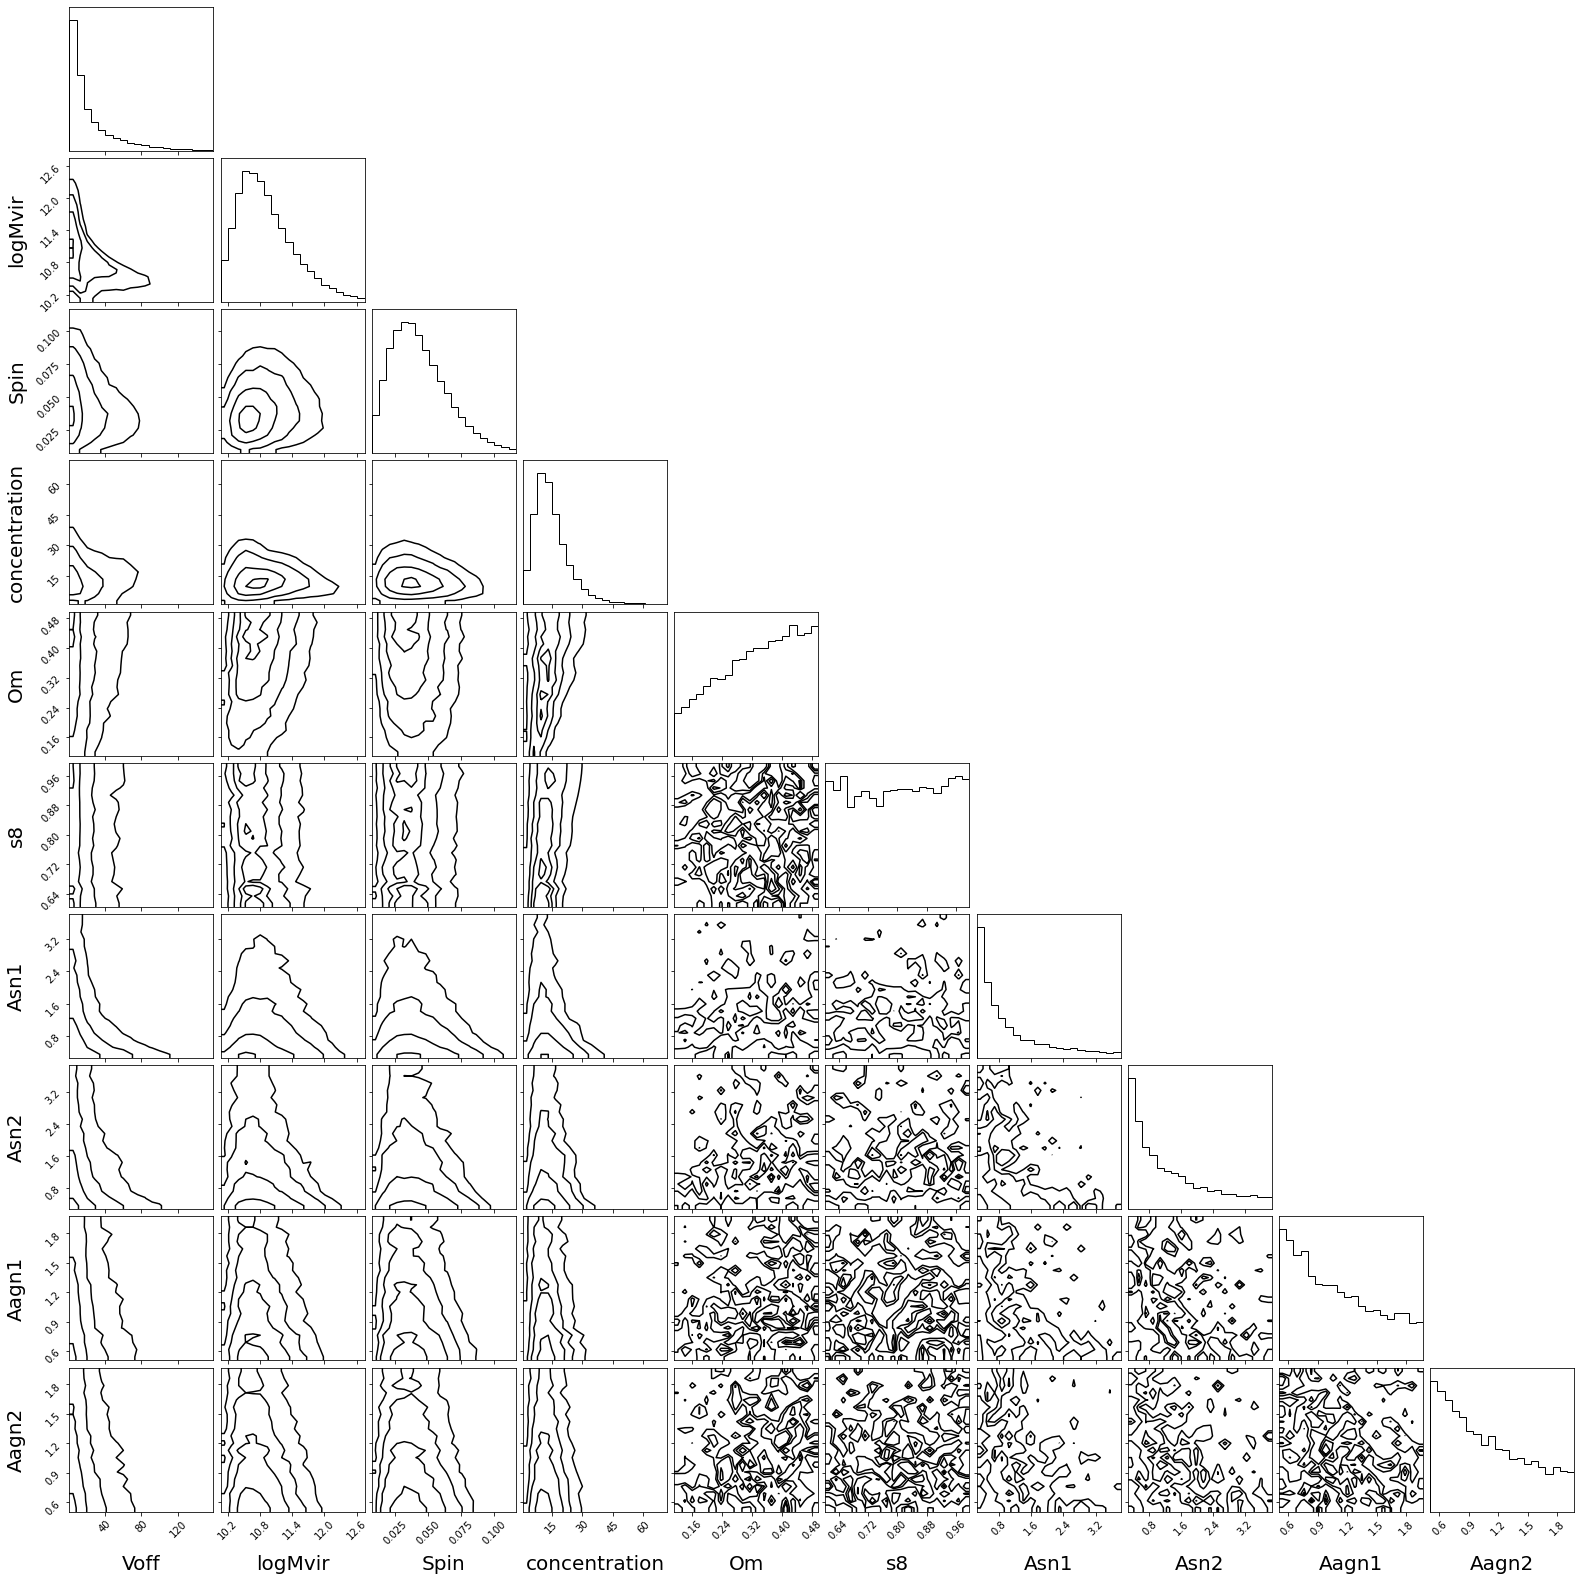

In [24]:
fig = DFM.corner(_data[Mlim][::10], color='k',
               range=ranges, 
               labels=['Voff', 'logMvir', 'Spin', 'concentration', 'Om', 's8', 'Asn1', 'Asn2', 'Aagn1', 'Aagn2'], 
               label_kwargs={'fontsize': 20}, 
               plot_datapoints=False, plot_density=False)

In [25]:
_data = np.array([np.array(halos[col].data) for col in ['Xoff', 'logMvir', 'Spin', 'concentration', 'Om', 's8', 'Asn1', 'Asn2', 'Aagn1', 'Aagn2']]).T

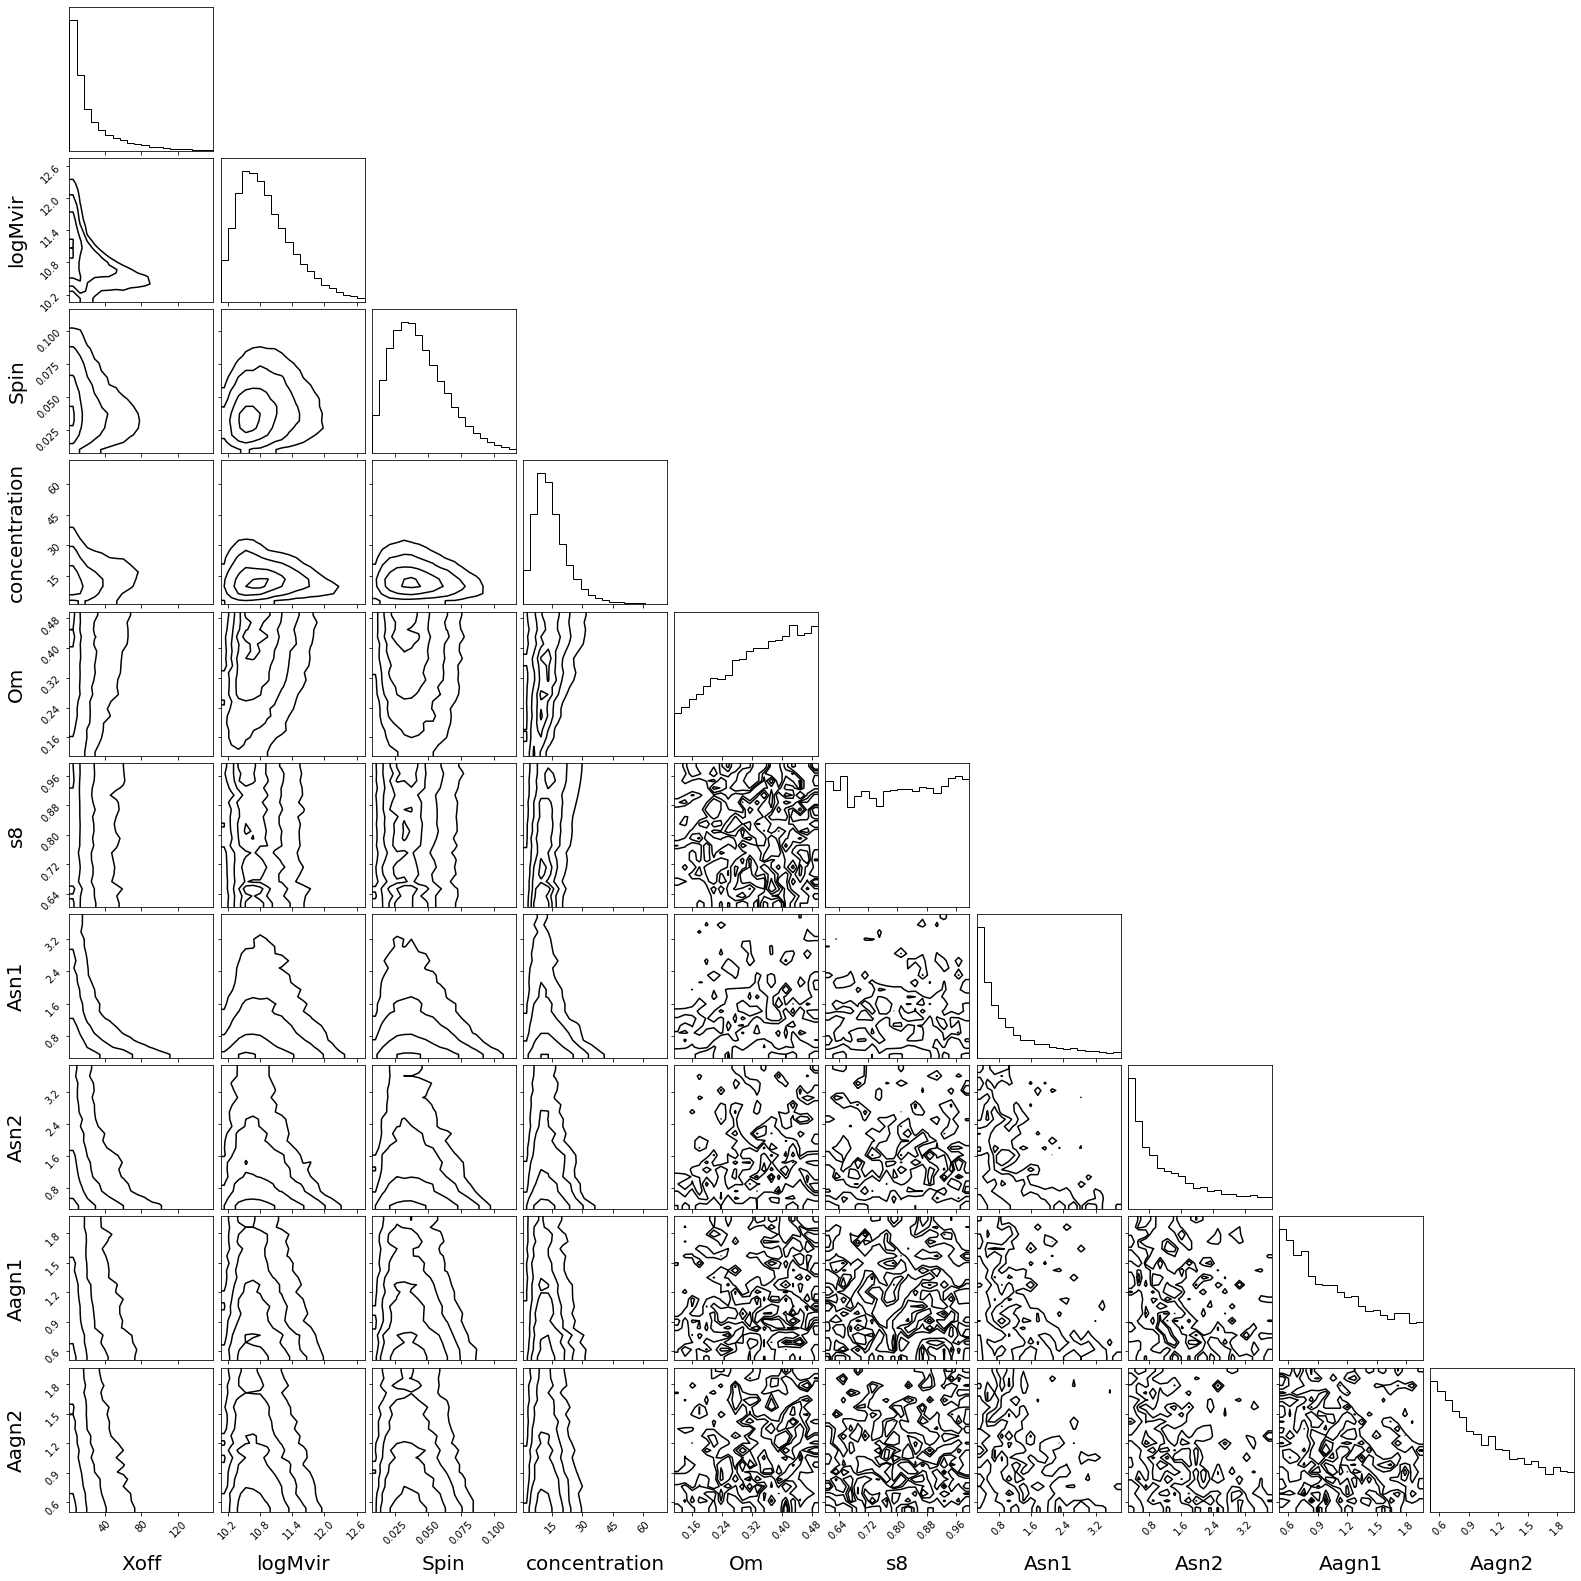

In [26]:
fig = DFM.corner(_data[Mlim][::10], color='k',
               range=ranges, 
               labels=['Xoff', 'logMvir', 'Spin', 'concentration', 'Om', 's8', 'Asn1', 'Asn2', 'Aagn1', 'Aagn2'], 
               label_kwargs={'fontsize': 20}, 
               plot_datapoints=False, plot_density=False)